In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(20*5*5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size()[0],-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [3]:
# Load the MNIST dataset
train_batch_size = 100
test_batch_size = 64
transform = transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1309,), (0.3083,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
trainset.targets = temp
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

In [4]:
def train_model(model, optimizer):
    model.train()
    train_losses, test_losses, accuracies = [], [], []
    for epoch in range(100):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(trainloader))
        
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in testloader:
                outputs = model(data)
                test_loss += criterion(outputs, target).item()
                pred = outputs.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()
        test_losses.append(test_loss / len(testloader))
        
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
    return train_losses, test_losses

In [5]:
model = CNN_Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses, test_losses = train_model(model, optimizer)

Epoch 1, Train Loss: 2.3030, Test Loss: 2.3027
Epoch 2, Train Loss: 2.3028, Test Loss: 2.3025
Epoch 3, Train Loss: 2.3028, Test Loss: 2.3029
Epoch 4, Train Loss: 2.3028, Test Loss: 2.3032
Epoch 5, Train Loss: 2.3027, Test Loss: 2.3030
Epoch 6, Train Loss: 2.3027, Test Loss: 2.3031
Epoch 7, Train Loss: 2.3027, Test Loss: 2.3028
Epoch 8, Train Loss: 2.3027, Test Loss: 2.3026
Epoch 9, Train Loss: 2.3027, Test Loss: 2.3028
Epoch 10, Train Loss: 2.3027, Test Loss: 2.3029
Epoch 11, Train Loss: 2.3027, Test Loss: 2.3027
Epoch 12, Train Loss: 2.3027, Test Loss: 2.3028
Epoch 13, Train Loss: 2.3027, Test Loss: 2.3028
Epoch 14, Train Loss: 2.3027, Test Loss: 2.3029
Epoch 15, Train Loss: 2.3027, Test Loss: 2.3029
Epoch 16, Train Loss: 2.3027, Test Loss: 2.3027
Epoch 17, Train Loss: 2.3027, Test Loss: 2.3026
Epoch 18, Train Loss: 2.3027, Test Loss: 2.3028
Epoch 19, Train Loss: 2.3027, Test Loss: 2.3029
Epoch 20, Train Loss: 2.3026, Test Loss: 2.3030
Epoch 21, Train Loss: 2.3027, Test Loss: 2.3029
E

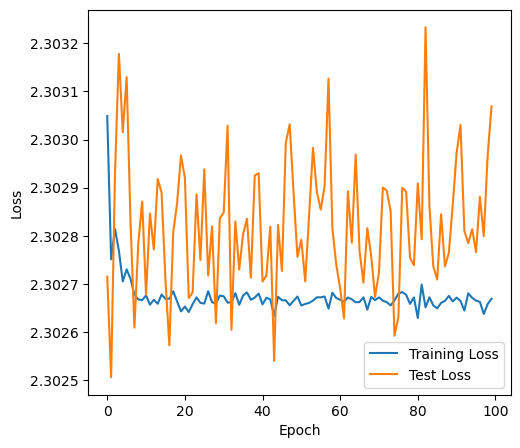

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()